# Data Analysis: Manipulating CS Variability

Januar - 2021, Kathrin Reichmann

Content: *Analysis of direct measure*

    (1) variability x type
    (2) variability x type x measure (indirect first vs. direct first)
    (3) including categories

## Read Tables

Load packages

In [9]:
library(dplyr)
#library(tidyverse)

In [11]:
#Plot
library(ggplot2)

In [13]:
#Analysis
library(afex)
library(lme4)

Add Functions

In [38]:
#Functions
CI <- function(x) qnorm(0.975)*sd(x)/sqrt(length(x))
se <- function(x) sd(x)/sqrt(length(x))

Read Tables

In [39]:
#export files
setwd("\\\\sn00.zdv.uni-tuebingen.de/siskr01/Documents/Github/CSCond_analysis/CSCond_analysis/data")
#setwd("C:/Users/reich/Documents/GitHub/CSCond_analysis")
direct <- read.csv2('direct.csv', header = TRUE)

In [40]:
str(direct)

'data.frame':	9721 obs. of  12 variables:
 $ X             : Factor w/ 9720 levels "10000","10001",..: 2219 2220 2273 2282 2293 2352 2365 2366 2403 2404 ...
 $ response      : int  21 -51 40 -79 -86 -70 -100 25 -37 -58 ...
 $ subject       : Factor w/ 200 levels "02a80kdxm7","03rysffm8e",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ condition     : Factor w/ 2 levels "many_one","one_one": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition_code: int  0 0 0 0 0 0 0 0 0 0 ...
 $ measure       : Factor w/ 2 levels "direct_first",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ measure_code  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ val           : Factor w/ 2 levels "neg","pos": 2 2 1 2 1 1 1 2 1 1 ...
 $ type          : Factor w/ 3 levels "All","CS","GS": 3 3 2 3 2 3 2 2 3 3 ...
 $ type_specific : Factor w/ 5 levels "abstract","all",..: 5 5 3 5 3 1 3 3 4 5 ...
 $ category      : int  4 3 1 3 1 2 2 4 2 2 ...
 $ cs_selected   : Factor w/ 60 levels "1/CS1","1/CS10",..: 53 33 2 32 7 29 21 55 26 22 ...


In [42]:
direct[is.na(direct == TRUE),]

,X,response,subject,condition,condition_code,measure,measure_code,val,type,type_specific,category,cs_selected
1473,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
direct$type_specific

[1] GSsim   GSsim   CS      GSsim   CS      Feature CS      CS      GSdiff 
  [10] GSsim   GSsim   GSsim   GSsim   CS      CS      GSdiff  CS      GSsim  
  [19] CS      CS      Feature GSdiff  CS      CS      CS      CS      GSsim  
  [28] CS      GSdiff  CS      GSsim   GSdiff  GSsim   CS      Feature Feature
  [37] GSdiff  GSdiff  GSdiff  GSdiff  GSdiff  GSdiff  CS      CS      CS     
  [46] CS      GSdiff  GSsim   All     All     All     All     CS      Feature
  [55] GSsim   Feature GSsim   CS      GSsim   GSsim   CS      CS      CS     
  [64] GSdiff  GSsim   GSsim   GSsim   GSsim   GSdiff  CS      CS      Feature
  [73] CS      CS      CS      GSsim   GSdiff  GSdiff  CS      GSdiff  GSdiff 
  [82] CS      GSsim   CS      CS      Feature CS      CS      CS      CS     
  [91] GSsim   GSdiff  GSdiff  CS      GSdiff  GSdiff  GSsim   GSdiff  CS     
 [100] GSdiff  All     All     All     All     GSdiff  Feature CS      CS     
 [109] CS      GSdiff  CS      GSsim   GSsim   CS      CS      GSsim   GSsim  
 [118] GSsim   GSsim   CS      GSdiff  CS      GSsim   GSdiff  CS      GSdiff 
 [127] GSdiff  GSsim   GSdiff  CS      Feature CS      CS      CS      GSsim  
 [136] CS      GSdiff  Feature GSdiff  CS      CS      CS      GSsim   GSdiff 
 [145] GSdiff  GSdiff  CS      GSsim   GSsim   Feature CS      CS      All    
 [154] All     All     All     GSdiff  GSdiff  GSdiff  GSsim   GSdiff  GSsim  
 [163] GSdiff  GSsim   GSsim   GSdiff  CS      GSsim   GSsim   GSdiff  Feature
 [172] GSsim   GSdiff  GSsim   CS      GSdiff  Feature GSdiff  Feature GSsim  
 [181] GSdiff  GSsim   CS      GSsim   Feature GSdiff  GSsim   CS      All    
 [190] All     All     All     GSdiff  Feature GSsim   GSsim   GSdiff  CS     
 [199] GSdiff  GSsim   CS      CS      GSsim   GSdiff  Feature GSdiff  CS     
 [208] CS      CS      GSsim   GSsim   CS      CS      CS      GSdiff  CS     
 [217] GSdiff  GSsim   Feature GSdiff  GSdiff  GSsim   GSdiff  CS      CS     
 [226] GSsim   Feature CS      CS      CS      GSsim   CS      GSsim   GSdiff 
 [235] CS      CS      GSdiff  CS      GSsim   CS      All     All     All    
 [244] All     CS      GSsim   GSdiff  GSsim   GSdiff  GSdiff  GSdiff  CS     
 [253] CS      GSdiff  GSdiff  Feature Feature GSdiff  GSdiff  GSsim   CS     
 [262] GSsim   GSdiff  GSdiff  GSsim   GSsim   GSsim   GSsim   GSsim   GSdiff 
 [271] GSsim   GSsim   GSsim   Feature GSdiff  Feature All     All     All    
 [280] All     Feature GSdiff  GSsim   GSsim   GSsim   Feature CS      GSsim  
 [289] GSdiff  GSdiff  CS      Feature GSdiff  CS      GSsim   GSsim   GSdiff 
 [298] GSdiff  CS      GSdiff  GSdiff  GSsim   GSsim   GSdiff  GSsim   Feature
 [307] GSdiff  GSdiff  GSsim   GSdiff  GSsim   GSsim   All     All     All    
 [316] All     GSdiff  Feature GSdiff  GSdiff  Feature GSdiff  GSdiff  GSsim  
 [325] Feature GSsim   GSsim   GSsim   GSsim   Feature CS      GSdiff  GSdiff 
 [334] GSsim   CS      GSsim   GSdiff  GSsim   GSdiff  CS      GSsim   CS     
 [343] GSdiff  GSdiff  GSdiff  GSsim   GSsim   GSsim   All     All     All    
 [352] All     CS      GSsim   CS      CS      CS      GSsim   Feature GSdiff 
 [361] GSsim   GSdiff  GSdiff  CS      GSsim   GSsim   Feature CS      GSdiff 
 [370] CS      GSdiff  CS      CS      CS      GSdiff  CS      GSsim   CS     
 [379] GSsim   CS      CS      GSdiff  Feature GSsim   CS      CS      GSsim  
 [388] GSdiff  GSdiff  GSsim   CS      GSdiff  GSdiff  GSsim   GSdiff  CS     
 [397] CS      GSsim   CS      Feature All     All     All     All     GSsim  
 [406] GSdiff  Feature GSsim   GSdiff  GSsim   GSdiff  GSsim   GSdiff  GSsim  
 [415] Feature GSdiff  Feature GSsim   GSdiff  GSsim   Feature GSdiff  GSdiff 
 [424] GSsim   GSdiff  GSdiff  GSdiff  CS      GSsim   GSsim   GSsim   GSsim  
 [433] CS      GSdiff  CS      CS      All     All     All     All     GSdiff 
 [442] GSdiff  GSsim   GSsim   GSdiff  GSdiff  GSsim   GSsim   GSsim   GSdiff 
 [451] CS      GSsim   GSsim   GSdiff  GSdiff  GSdiff

In [23]:
#aggregate scores for each subject
dataDirect <- aggregate(response ~ subject + condition + measure + val + type_specific, direct, mean)
dataDirect$nr_obs <- aggregate(response ~ subject + condition + measure + val + type_specific, direct, length)[[6]]

#calculate differences between positive and negative valence, considering each type of measure
for (name in unique(dataDirect$type_specific)){
    temp <- dataDirect[dataDirect$type_specific == name,];
    dataDirect$diff[dataDirect$type_specific == name] <- temp$response[temp$val == "pos"] - temp$response[temp$val == "neg"]
}

head(dataDirect)

subject,condition,measure,val,type_specific,response,nr_obs,diff2
05j2327rvx,many_one,direct_first,neg,abstract,-63.5,2,68.0
1z04sepqyo,many_one,direct_first,neg,abstract,-86.5,2,114.0
1zw137onrg,many_one,direct_first,neg,abstract,-50.5,2,150.5
2tvgx5ewo4,many_one,direct_first,neg,abstract,-59.5,2,35.0
2utcay5yvz,many_one,direct_first,neg,abstract,-34.5,2,52.5
3uzo9du3nx,many_one,direct_first,neg,abstract,-4.5,2,23.5


### (1) Test for basic learning effects

#### Plot: interaction variability x type (on difference scores)

In [24]:
direct.type_specific <- aggregate(diff ~ condition + type_specific, dataDirect, mean)
direct.type_specific$sd <- aggregate(diff ~ condition + type_specific, dataDirect, sd)[[3]]
direct.type_specific$se <- aggregate(diff ~ condition + type_specific, dataDirect, se)[[3]]
direct.type_specific$CI <- aggregate(diff ~ condition + type_specific, dataDirect, CI)[[3]]
#direct.type_specific

barplotDiff <- ggplot(direct.type_specific, aes (x = type_specific, y = diff, fill = condition)) +
  geom_bar(stat = 'identity', position = position_dodge(), show.legend = TRUE) +
  geom_errorbar(aes(ymin= diff - se, ymax= diff + se), width=.2,
                position=position_dodge(.9)) +
  ggtitle("Differences") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Paired") +
  scale_y_continuous (name = "Pos - Neg", breaks = seq(-25, 100, 25), limits = c(-10, 100)) + 
  theme_classic()
barplotDiff

ERROR: Error in model.frame.default(formula = diff ~ condition + type_specific, : Objekt ist keine Matrix


#### Boxplot: Differences Variability x Type

Warning message:
"Removed 326 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 326 rows containing non-finite values (stat_boxplot)."

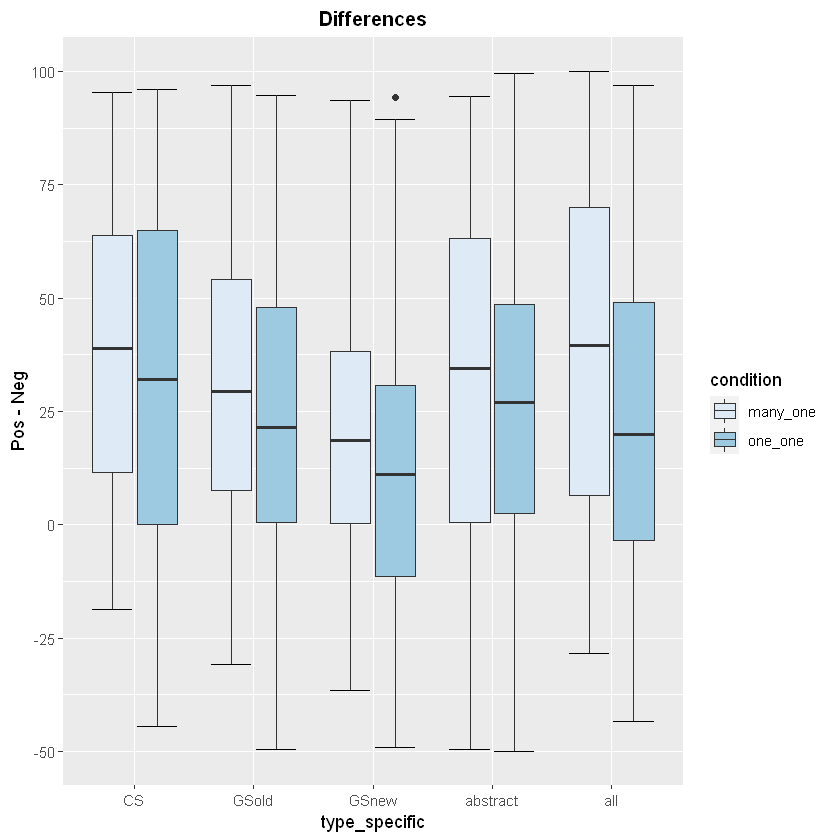

In [30]:
diffDirect <- ggplot(dataDirect, aes (x = type_specific, y = diff, fill = condition)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(show.legend = TRUE) +
  ggtitle("Differences") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") +
  scale_y_continuous (name = "Pos - Neg", breaks = seq(-100, 200, 25), limits = c(-50, 100))
diffDirect

#### Barplot: negative and positive Pairings

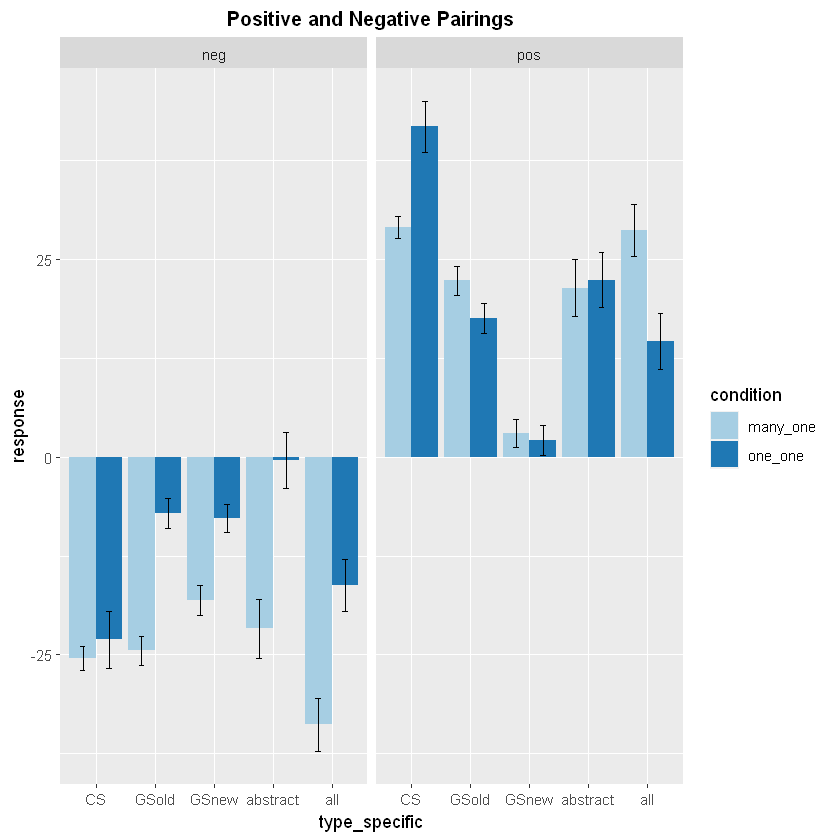

In [31]:
barplotDirect <- aggregate(response ~ type_specific + condition + val,direct, mean)
barplotDirect$se <- aggregate(response ~ type_specific + condition + val, direct, se)[[4]]

barplot.val <- ggplot(barplotDirect, aes (x = type_specific, y = response, fill = condition)) +
  facet_grid(. ~ val) +
  geom_bar(stat = 'identity', position = position_dodge(), show.legend = TRUE) +
  geom_errorbar(aes(ymin= response - se, ymax= response + se), width=.2,
                position=position_dodge(.9)) +
  ggtitle("Positive and Negative Pairings") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Paired") 
barplot.val

#### ANOVA: Variability (one-one vs. many-one, between) vs. Type (CS vs. GSold, within) 

In [32]:
direct.type <- aggregate(diff ~ condition + type_specific + subject, dataDirect[dataDirect$type_specific == "CS" | dataDirect$type_specific == "GSold",], mean)
aov_specific <- aov_car(diff ~ condition*type_specific + Error(subject/type_specific), direct.type, anova_table = list("pes"))
#summary(aov_specific)

Contrasts set to contr.sum for the following variables: condition


In [135]:
#main effect type
#aggregate(diff ~ type_specific, direct.type, mean)

In [136]:
#interaction effect
#aggregate(diff ~ type_specific + condition, direct.type, mean)

#### ANOVA: variability (one-one vs. many-one, between) vs.  type (CS vs. GSold vs. GSnew vs. abstract vs. all, within) 

In [33]:
aov_specific2 <- aov_car(diff ~ condition*type_specific + Error(subject/type_specific), dataDirect,  anova_table = list("pes"))
aov_specific2
#summary(aov_specific2)

Warning message:
"More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!"Contrasts set to contr.sum for the following variables: condition


Anova Table (Type 3 tests)

Response: diff
                   Effect           df     MSE         F  pes p.value
1               condition       1, 198 7930.82   7.07 ** .034    .008
2           type_specific 3.70, 732.60 1166.14 50.39 *** .203   <.001
3 condition:type_specific 3.70, 732.60 1166.14 11.76 *** .056   <.001
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1

Sphericity correction method: GG 

In [34]:
#interaction effect & main effects
aggregate(diff ~ condition + type_specific, dataDirect, mean)
aggregate(diff ~ condition, dataDirect, mean)
aggregate(diff ~ type_specific, dataDirect, mean)

condition,type_specific,diff
many_one,CS,54.524242
one_one,CS,64.910891
many_one,GSold,46.772727
one_one,GSold,24.610561
many_one,GSnew,21.030303
one_one,GSnew,9.866337
many_one,abstract,43.116162
one_one,abstract,22.801980
many_one,all,62.545455
one_one,all,30.920792


condition,diff
many_one,45.59778
one_one,30.62211


type_specific,diff
CS,59.76950
GSold,35.58083
GSnew,15.39250
abstract,32.85750
all,46.57500


In [37]:
#difference CS
#n.s.
type1 <- lm(diff ~ condition, dataDirect[dataDirect$type_specific == "CS",] )
#summary(type1)
#anova(type1)

In [38]:
#difference GSold
#s.
type2 <- lm(diff ~ condition, dataDirect[dataDirect$type_specific == "GSold",] )
#summary(type1)
#anova(type2)

In [39]:
#difference GSnew
#s.
type3 <- lm(diff ~ condition, dataDirect[dataDirect$type_specific == "GSnew",] )
#summary(type1)
#anova(type3)

In [40]:
#difference abstract
#s.
type4 <- lm(diff ~ condition, dataDirect[dataDirect$type_specific == "abstract",] )
#summary(type1)
#anova(type4)

In [41]:
#difference all
#s.
type5 <- lm(diff ~ condition, dataDirect[dataDirect$type_specific == "all",] )
#summary(type1)
# anova(type5)

#### LM: variability x type (CS vs. GSold)

In [ ]:
lmDiff1 <- lm(diff ~ condition*type, dataDirect[dataDirect$type_specific == "CS" | dataDirect$type_specific == "GSold",])
#summary(lmDiff1)
#plot(lmDiff1)

#### LM: variability x type_specific

In [36]:
lmDiff2 <- lm(diff ~ condition*type_specific, dataDirect)
#summary(lmDiff2)
#plot(lmDiff2)

#### ANOVA: Variability x type x Measure (direct first vs. indirect first)

In [43]:
aov_specific3 <- aov_car(diff ~ condition*type_specific*measure + Error(subject/type_specific), dataDirect, anova_table = list("pes"))
#aov_specific3
summary(aov_specific3)

Warning message:
"More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!"Contrasts set to contr.sum for the following variables: condition, measure



Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                                 Sum Sq num Df Error SS den Df  F value
(Intercept)                     1454682      1  1566383    196 182.0231
condition                         54036      1  1566383    196   6.7614
measure                            3611      1  1566383    196   0.4519
condition:measure                   298      1  1566383    196   0.0373
type_specific                    218195      4   845783    784  50.5642
condition:type_specific           51844      4   845783    784  12.0141
measure:type_specific              1293      4   845783    784   0.2997
condition:measure:type_specific    7253      4   845783    784   1.6808
                                   Pr(>F)    
(Intercept)                     < 2.2e-16 ***
condition                         0.01002 *  
measure                           0.50223    
condition:measure                 0.84706    
type_specific                   < 2.2e-16 ***
condition:

In [ ]:
lmMeas1 <- lm(diff ~ condition*type*measure, dataDirect[dataDirect$type_specific == "CS" | dataDirect$type_specific == "GSold",])
#summary(lmMeas1)

### Additional Plots direct measure

#### Boxplot: Positive pairings

In [44]:
positiveDirect <- ggplot(direct[direct$val == "pos",], aes (x = type_specific, y = response, fill = condition)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(show.legend = TRUE) +
  ggtitle("Positive Pairings") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") 
#positiveDirect

#### Boxplot: Negative pairings

In [45]:
negativeDirect <- ggplot(dataDirect[dataDirect$val == "neg",], aes (x = type_specific, y = response, fill = condition)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(show.legend = TRUE) +
  ggtitle("Negative Pairings") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") 
#negativeDirect


#### Barplot: Variability x Type x Measure (direct first vs. indirect first")

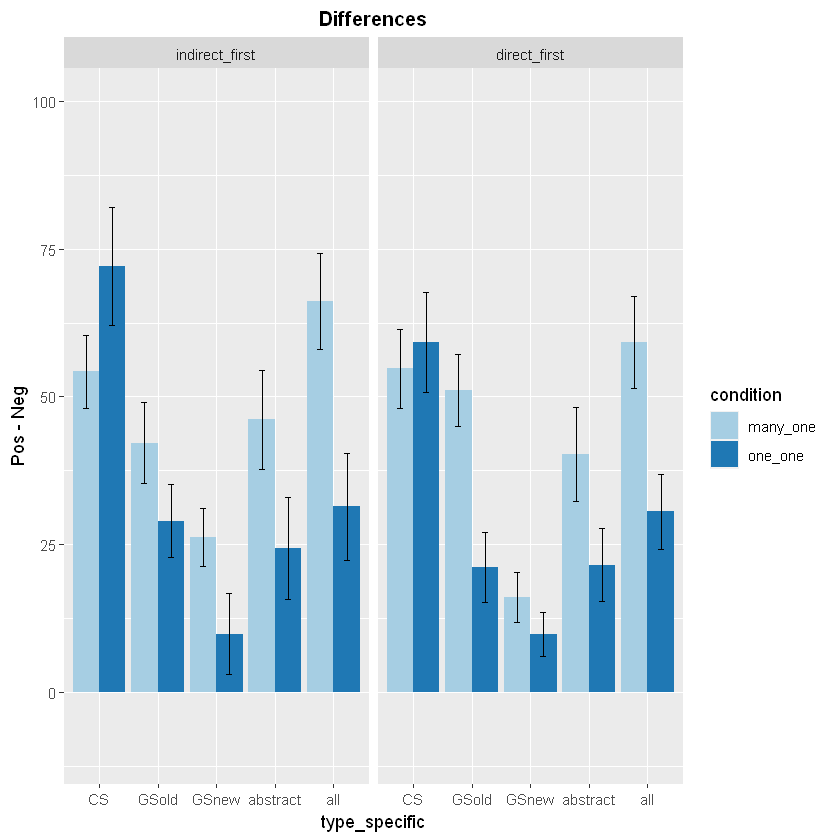

In [46]:
barplotMeasure <- aggregate(diff ~ type_specific + condition + measure, dataDirect[dataDirect$val == "pos",], mean)
barplotMeasure$se <- aggregate(diff ~ type_specific + condition + measure, dataDirect[dataDirect$val == "pos",], se)[[4]]

plotMeasure <- ggplot(barplotMeasure, aes (x = type_specific, y = diff, fill = condition)) +
  facet_grid(. ~ measure) +
  geom_bar(stat = 'identity', position = position_dodge(), show.legend = TRUE) +
  geom_errorbar(aes(ymin= diff - se, ymax= diff + se), width=.2,
                position=position_dodge(.9)) +
  ggtitle("Differences") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Paired") +
  scale_y_continuous (name = "Pos - Neg", breaks = seq(-25, 125, 25), limits = c(-10, 100))
plotMeasure

#### Boxplot: Categories x Valence

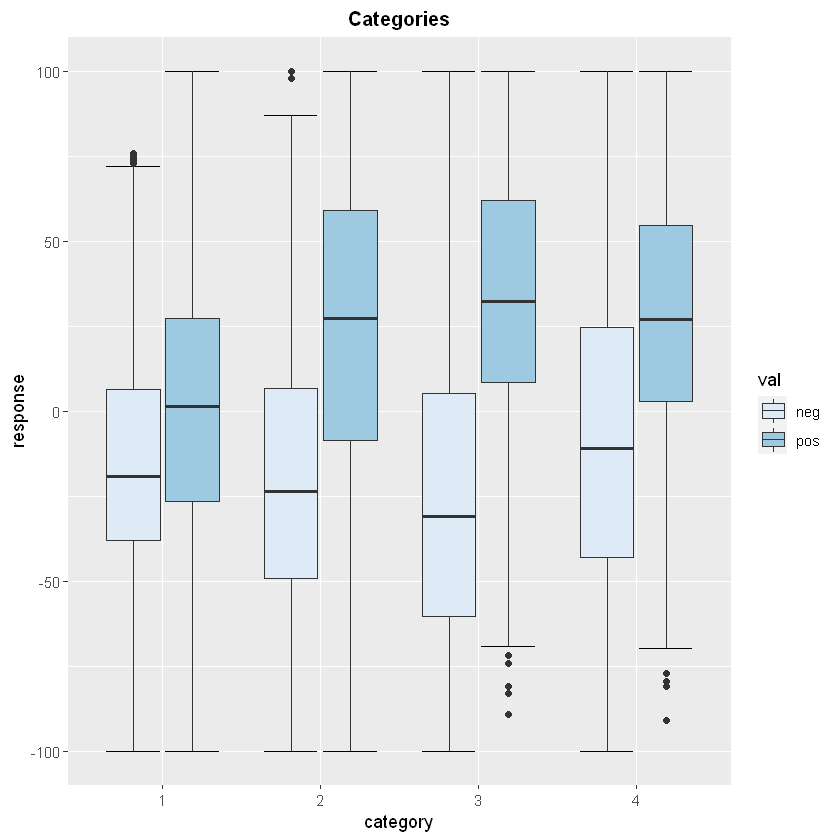

In [47]:
categoryDirect <- aggregate(response ~ subject + condition_code + condition + measure_code + val + type + type_specific + category, direct, mean)
categoryDirect$nr_obs <- aggregate(response ~ subject + condition_code + condition + measure_code + val + type + type_specific + category, direct, length)[[8]]

categoryDirectPlot <- ggplot(categoryDirect, aes (x = category, y = response, fill = val)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(show.legend = TRUE) +
  ggtitle("Categories") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") 
categoryDirectPlot

#### Scatterplot: CSs x Valence

In [ ]:
#category3/CS9.png especially positive

In [48]:
csSelectedDirect <- aggregate(response ~ cs_selected + val, dat, mean)
csDirectPlot <- ggplot(csSelectedDirect, aes (x = cs_selected, y = response, col = val)) +
  geom_point(show.legend = TRUE)
  ggtitle("Single CSs") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") 
#csDirectPlot

NULL

##  Indirect Measure

indirect: 0 = unangenehm, 1 = angenehm

### Data preparation & Extract relevant columns

In [49]:
#extract relevant columns
indirect <- dat[dat$task == "indirect",]
indirect <- indirect[c('indirect', 'rt', 'subject', 'condition', 'condition_code', 'measure', 'measure_code', 'val', 'type', 'type_specific', 'category', 'cs_selected', 'target', 'nr_pres')]

as_factor <- append(as_factor, "target")
for (factor in as_factor){
  indirect[, factor] <- as.factor(indirect[,factor])
}

In [50]:
indirect$response <- as.numeric(indirect$indirect)
indirect$indirect <- NULL
indirect$nr_pres <- as.numeric(indirect$nr_pres)
indirect$rt <- as.numeric(indirect$rt)
str(indirect)

'data.frame':	8921 obs. of  14 variables:
 $ rt            : num  68 76 18 5 10 25 13 110 44 53 ...
 $ subject       : Factor w/ 238 levels "02a80kdxm7","03rysffm8e",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ condition     : Factor w/ 2 levels "many_one","one_one": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition_code: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ measure       : Factor w/ 2 levels "indirect_first",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ measure_code  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ val           : Factor w/ 3 levels "","neg","pos": 3 3 3 3 3 2 2 3 3 2 ...
 $ type          : Factor w/ 4 levels "","All","CS",..: 3 3 3 3 4 3 3 3 3 4 ...
 $ type_specific : Factor w/ 6 levels "","abstract",..: 4 4 4 4 6 4 4 4 4 6 ...
 $ category      : Factor w/ 4 levels "1","2","3","4": 3 4 4 3 3 2 1 4 4 2 ...
 $ cs_selected   : Factor w/ 61 levels "","1/CS1","1/CS10",..: 35 47 51 41 34 17 8 56 53 24 ...
 $ target        : Factor w/ 49 levels "","1","10","11",..: 41 32 17 23 16 10 38 43 

In [51]:
indirect$type_specific <- factor(indirect$type_specific, levels = c('CS', 'GSold', 'GSnew', 'abstract'))

In [232]:
#export files
#setwd("\\\\sn00.zdv.uni-tuebingen.de/siskr01/Documents/Github/Exp1a_data_analysis/CSCond_analysis/data")
setwd("C:/Users/reich/Documents/GitHub/CSCond_analysis")
write.csv2(indirect, file = 'indirect.csv')

#### (1) Proportion of "angenehm" of all answers of a cell

In [52]:
#generate variabile prob
dataIndirect <- aggregate(response ~ subject + condition_code + condition + measure + val + type + type_specific, indirect, sum )
dataIndirect$nr_val <- aggregate(response ~ subject + condition_code + condition + measure + val + type + type_specific, indirect, length)[[8]]
dataIndirect$prob <- (dataIndirect$response/dataIndirect$nr_val) #prob: proportion "angenehm" of positive / negative stimuli in the respective condition
head(dataIndirect)

subject,condition_code,condition,measure,val,type,type_specific,response,nr_val,prob
02a80kdxm7,0,many_one,indirect_first,neg,CS,CS,7,10,0.7
03rysffm8e,0,many_one,indirect_first,neg,CS,CS,3,10,0.3
0m0jrs2srj,0,many_one,indirect_first,neg,CS,CS,5,10,0.5
12gexjlo94,0,many_one,indirect_first,neg,CS,CS,8,10,0.8
26btee9n2n,0,many_one,indirect_first,neg,CS,CS,7,10,0.7
2aj9uo7pfl,0,many_one,indirect_first,neg,CS,CS,2,10,0.2


#### Differences between probabilities of positive and negative CSs

In [53]:
#generate variable diff
for (subj in unique(dataIndirect$subject)){
  for (name in unique(dataIndirect$type_specific)){
    temp <- dataIndirect[dataIndirect$subject == subj & dataIndirect$type_specific == name,];
    dataIndirect$diff[dataIndirect$subject == subj & dataIndirect$type_specific == name] <- temp$prob[temp$val == "pos"] - temp$prob[temp$val == "neg"]
  }
}

#### (2) Dichotom variable "angenehm" and "unangenehm" for every subject and condition

In [54]:
dataIndirect$an <- dataIndirect$response #column for "unangenehm" answer
dataIndirect$un <- dataIndirect$nr_val - dataIndirect$response #column for "angenehm" answer
head(dataIndirect)

subject,condition_code,condition,measure,val,type,type_specific,response,nr_val,prob,diff,an,un
02a80kdxm7,0,many_one,indirect_first,neg,CS,CS,7,10,0.7,0.0,7,3
03rysffm8e,0,many_one,indirect_first,neg,CS,CS,3,10,0.3,0.2,3,7
0m0jrs2srj,0,many_one,indirect_first,neg,CS,CS,5,10,0.5,0.0,5,5
12gexjlo94,0,many_one,indirect_first,neg,CS,CS,8,10,0.8,-0.5,8,2
26btee9n2n,0,many_one,indirect_first,neg,CS,CS,7,10,0.7,0.0,7,3
2aj9uo7pfl,0,many_one,indirect_first,neg,CS,CS,2,10,0.2,0.6,2,8


### Inference Statistics *(1) proportion "angenehm" of all answers*

#### Barplot: Variability x Type_specific (on difference scores)

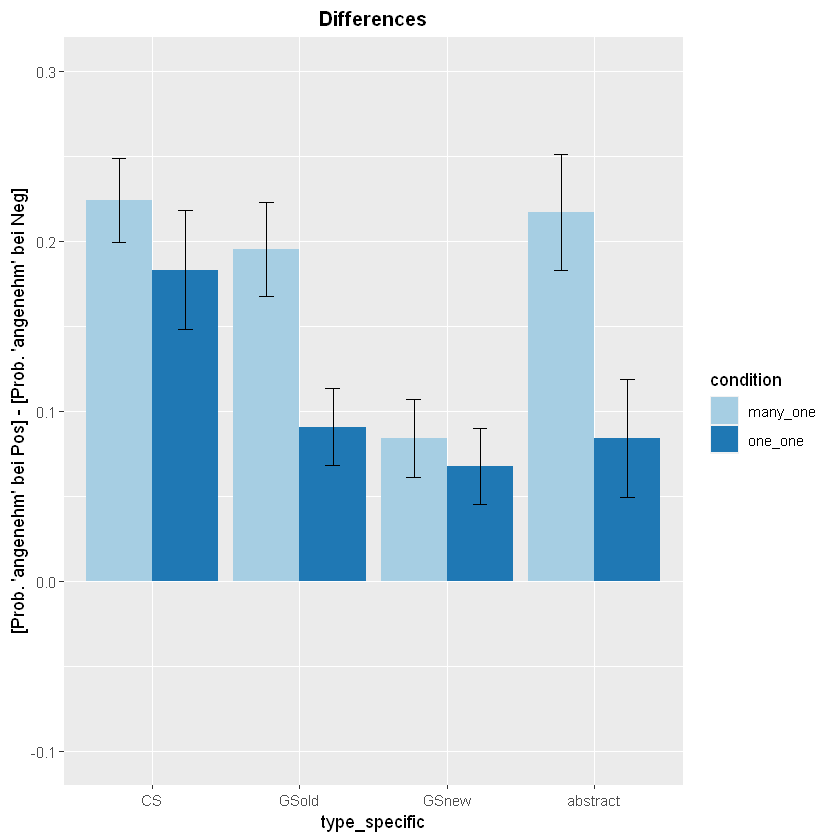

In [55]:
barplotDiffData <- aggregate(diff ~ condition + type_specific, dataIndirect, mean)
barplotDiffData$se <- aggregate(diff ~ condition + type_specific, dataIndirect, se)[[3]]

barplotDiff <- ggplot(barplotDiffData, aes (x = type_specific, y = diff, fill = condition)) +
  geom_bar(stat = 'identity', position = position_dodge(), show.legend = TRUE) +
  geom_errorbar(aes(ymin= diff - se, ymax= diff + se), width=.2,
                position=position_dodge(.9)) +
  ggtitle("Differences") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Paired") +
  scale_y_continuous (name = "[Prob. 'angenehm' bei Pos] - [Prob. 'angenehm' bei Neg]", breaks = seq(-0.1, 0.3, 0.1), limits = c(-0.1, 0.3))
barplotDiff

#### Barplot: Variability x type_specific x valence (on probabilities)

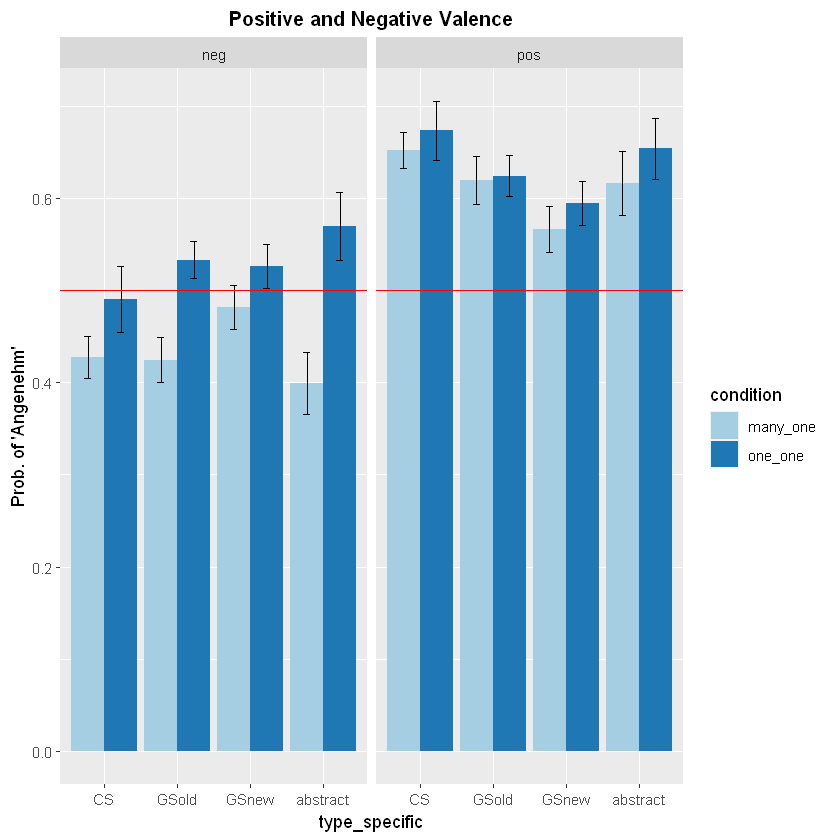

In [56]:
barplotDiffData <- aggregate(prob ~ val + type_specific + condition, dataIndirect, mean)
barplotDiffData$se <- aggregate(prob ~ val + type_specific + condition, dataIndirect, se)[[4]]

barplotPosNeg <- ggplot(barplotDiffData, aes (x = type_specific, y = prob, fill = condition)) +
  facet_grid(. ~ val)+
  geom_bar(stat = 'identity', position = position_dodge(), show.legend = TRUE) +
  geom_errorbar(aes(ymin= prob - se, ymax= prob + se), width=.2,
                position=position_dodge(.9)) +
    geom_hline(yintercept = 0.5, color = "red") +
  ggtitle("Positive and Negative Valence") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Paired") +
  scale_y_continuous(name = "Prob. of 'Angenehm'")
barplotPosNeg


#### Boxplot: Variability * Type_specific * Valence (on probabilities)


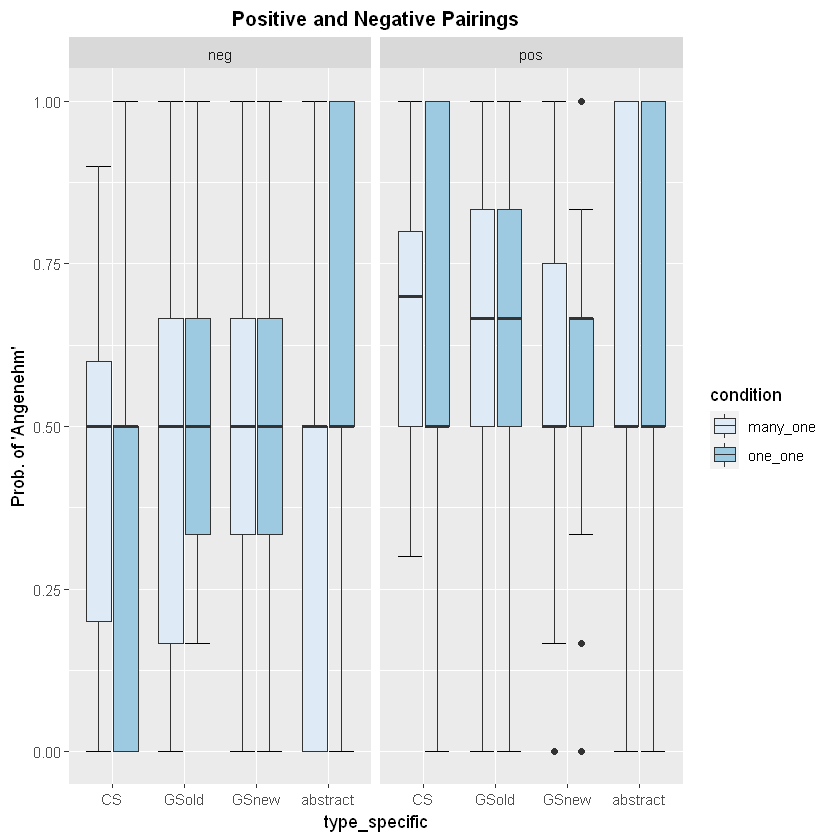

In [57]:
posnegIndirectData <- aggregate(prob ~ val + type_specific + condition, dataIndirect, mean)
posnegIndirect <- ggplot(dataIndirect, aes (x = type_specific, y = prob, fill = condition)) +
  facet_grid(. ~ val) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(show.legend = TRUE) +
  ggtitle("Positive and Negative Pairings") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") +
  scale_y_continuous(name = "Prob. of 'Angenehm'")
posnegIndirect


#### ANOVA: variability x type (CS vs. GSold)

In [ ]:
indirect.type <- aggregate(diff ~ condition + type + subject, dataIndirect[dataIndirect$type_specific == "CS" | dataIndirect$type_specific == "GSold",], mean)
aov_specific <- aov_car(diff ~ condition*type + Error(subject/type), indirect.type, anova_table = list("pes"))
#aov_specific
#summary(aov_specific)

#### ANOVA: variability x type_specific 

In [58]:
indirect.type_specific <- aggregate(diff ~ condition + type_specific + subject, dataIndirect, mean)
aov_specific2 <- aov_car(diff ~ condition*type_specific + Error(subject/type_specific), indirect.type_specific, anova_table = list("pes"))
aov_specific2
summary(aov_specific2)

Contrasts set to contr.sum for the following variables: condition


Anova Table (Type 3 tests)

Response: diff
                   Effect           df  MSE       F  pes p.value
1               condition       1, 198 0.29  3.71 + .018    .055
2           type_specific 2.88, 570.23 0.13 4.54 ** .022    .004
3 condition:type_specific 2.88, 570.23 0.13    1.21 .006    .304
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1

Sphericity correction method: GG 


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                         Sum Sq num Df Error SS den Df F value    Pr(>F)    
(Intercept)             16.4325      1   58.086    198 56.0138 2.307e-12 ***
condition                1.0887      1   58.086    198  3.7110  0.055486 .  
type_specific            1.6486      3   71.823    594  4.5448  0.003686 ** 
condition:type_specific  0.4401      3   71.823    594  1.2132  0.304095    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Mauchly Tests for Sphericity

                        Test statistic  p-value
type_specific                  0.93941 0.030945
condition:type_specific        0.93941 0.030945


Greenhouse-Geisser and Huynh-Feldt Corrections
 for Departure from Sphericity

                         GG eps Pr(>F[GG])   
type_specific           0.95999   0.004207 **
condition:type_specific 0.95999   0.303851   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                   

In [59]:
#main effect type_specific
aggregate(diff ~ type_specific, dataIndirect, mean)

type_specific,diff
CS,0.20350000
GSold,0.14250000
GSnew,0.07583333
abstract,0.15000000


#### LM: variability*type_specific

In [ ]:
lm.type_specific <- lm(diff ~ type_specific*condition, dataIndirect)
#summary(lm.type_specific)

#### LMER: variability*type_specific + (1|subject)

In [289]:
lm.type_specific2 <- lmer(diff ~ type_specific*condition + (1 | subject), dataIndirect)
#summary(lm.type_specific)

#### LMER: variability*type_specific + (type|subject)

In [60]:
lm.type_specific3 <- lmer(diff ~ type_specific*condition + (type | subject), dataIndirect)
summary(lm.type_specific3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: diff ~ type_specific * condition + (type | subject)
   Data: dataIndirect

REML criterion at convergence: 1127.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3675 -0.4689  0.0229  0.5045  2.8275 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subject  (Intercept) 0.14724  0.3837        
          typeGS      0.11911  0.3451   -0.76
 Residual             0.07767  0.2787        
Number of obs: 1600, groups:  subject, 200

Fixed effects:
                                         Estimate Std. Error         df t value
(Intercept)                              0.224242   0.043354 197.998400   5.172
type_specificGSold                      -0.028956   0.044584 261.540676  -0.649
type_specificGSnew                      -0.140067   0.044584 261.540676  -3.142
type_specificabstract                   -0.007071   0.044584 261.540676  -0.159
conditionone_one              

In [291]:
anova(lm.type_specific2, lm.type_specific3)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lm.type_specific2,10,1264.334,1318.112,-622.1672,1244.334,NA,NA,NA
lm.type_specific3,12,1109.358,1173.891,-542.6790,1085.358,158.9765,2,3.010844e-35


#### ANOVA: variability * type_specific * measure

In [ ]:
indirect.measure <- aggregate(diff ~ condition + measure + type_specific + subject, dataIndirect, mean)
aov_measure <- aov_car(diff ~ condition*type_specific*measure + Error(subject/type_specific), indirect.measure, anova_table = list("pes"))
#aov_measure
#summary(aov_measure)

#### LMER: type_specific * variability + (type_specific | target)

In [64]:
targetsIndirect <- aggregate(response ~ target + val + condition + type_specific, indirect, sum)
targetsIndirect$nr_val <- aggregate(response ~ target + val + condition + type_specific, indirect, length) [[5]]
targetsIndirect$prob <- (targetsIndirect$response/targetsIndirect$nr_val)
#targetsIndirect

#generate variable diff
#not all cells have data, yet!
for (target in unique(targetsIndirect$target)){
  for (name in unique(targetsIndirect$type_specific)){
    temp <- targetsIndirect[targetsIndirect$target == target & targetsIndirect$type_specific == name,];
    targetsIndirect$diff[targetsIndirect$target == target & targetsIndirect$type_specific == name] <- temp$prob[temp$val == "pos"] - temp$prob[temp$val == "neg"]
  }
}


target,val,condition,type_specific,response,nr_val,prob
1,neg,many_one,CS,7,15,0.4666667
10,neg,many_one,CS,10,24,0.4166667
11,neg,many_one,CS,6,16,0.3750000
12,neg,many_one,CS,10,17,0.5882353
13,neg,many_one,CS,13,21,0.6190476
14,neg,many_one,CS,8,16,0.5000000


Warning message in targetsIndirect$diff[targetsIndirect$target == target & targetsIndirect$type_specific == :
"Anzahl der zu ersetzenden Elemente ist kein Vielfaches der Ersetzungslänge"Warning message in targetsIndirect$diff[targetsIndirect$target == target & targetsIndirect$type_specific == :
"Anzahl der zu ersetzenden Elemente ist kein Vielfaches der Ersetzungslänge"Warning message in targetsIndirect$diff[targetsIndirect$target == target & targetsIndirect$type_specific == :
"Anzahl der zu ersetzenden Elemente ist kein Vielfaches der Ersetzungslänge"Warning message in targetsIndirect$diff[targetsIndirect$target == target & targetsIndirect$type_specific == :
"Anzahl der zu ersetzenden Elemente ist kein Vielfaches der Ersetzungslänge"Warning message in targetsIndirect$diff[targetsIndirect$target == target & targetsIndirect$type_specific == :
"Anzahl der zu ersetzenden Elemente ist kein Vielfaches der Ersetzungslänge"

In [65]:
head(targetsIndirect)

target,val,condition,type_specific,response,nr_val,prob,diff
1,neg,many_one,CS,7,15,0.4666667,0.1583333
10,neg,many_one,CS,10,24,0.4166667,0.3833333
11,neg,many_one,CS,6,16,0.3750000,0.2916667
12,neg,many_one,CS,10,17,0.5882353,0.2034314
13,neg,many_one,CS,13,21,0.6190476,0.0280112
14,neg,many_one,CS,8,16,0.5000000,0.2000000


In [68]:
lmProbTargets <- lmer(diff ~ type_specific*condition*val + (type_specific|target), targetsIndirect)
#summary(lmProbTargets)

#### Barplot: targets (on difference scores)

In [73]:
plot.targets <- aggregate(prob ~ target + val, targetsIndirect, mean)
plot.targets$target <- as.factor(plot.targets$target)

for(target in unique(plot.targets$target)){
  temp <- plot.targets[plot.targets$target == target,]
  plot.targets$diff[plot.targets$target == target] <- temp$prob[temp$val == "pos"] - temp$prob[temp$val == "neg"]
}
plotTarget <- ggplot(plot.targets[plot.targets$val == "neg",], aes (x = target, y = diff)) +
  geom_point() +
  ggtitle("Targets on x-axis") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_color_brewer(palette = "Set1") +
  scale_y_continuous(name = "Difference (Prob. Angenehm | Pos) - (Prob Angenehm | Neg)")
#plotTarget

### Inference Statistics (2) dichotome Variable

In [74]:
#GLM on (un, an)
glm1 <- glm(cbind(un, an) ~ 1, binomial, dataIndirect) #minimal model
glm2 <- glm(cbind(un, an) ~ condition + type_specific + val, binomial, dataIndirect)
glm3 <- glm(cbind(un, an) ~ condition* type_specific + val, binomial, dataIndirect)
glm4 <- glm(cbind(un, an) ~ condition* type_specific * val, binomial, dataIndirect) #saturated model
anova(glm1, glm2, glm3, glm4, test = "LRT")
summary(glm4)

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1599,2757.800,NA,NA,NA
1594,2565.947,5,191.853173,1.569128e-39
1591,2562.923,3,3.023662,3.879914e-01
1584,2527.782,7,35.140735,1.052343e-05



Call:
glm(formula = cbind(un, an) ~ condition * type_specific * val, 
    family = binomial, data = dataIndirect)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2077  -1.1261   0.1294   0.6159   3.4250  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                    0.29299    0.06425   4.560
conditionone_one                              -0.25338    0.15472  -1.638
type_specificGSold                             0.01239    0.10498   0.118
type_specificGSnew                            -0.21888    0.10426  -2.099
type_specificabstract                          0.11669    0.15871   0.735
valpos                                        -0.91869    0.09261  -9.920
conditionone_one:type_specificGSold           -0.18421    0.19354  -0.952
conditionone_one:type_specificGSnew            0.07356    0.19313   0.381
conditionone_one:type_specificabstract        -0.43532    0.25532  -1.705
conditionone_one

In [310]:
#main effect condition
predict(glm4, data.frame(condition = "one_one", type_specific = "CS", val = 'neg'), type = "resp")
predict(glm4, data.frame(condition = "one_one", type_specific = "GSnew", val = 'pos'), type = "resp")
#"WK angenehm bei one_one und CS"

1 
0.509901

1 
0.4059406

### Additional plots indirect measure

#### Barplot: Type_specific * Variability * Measure

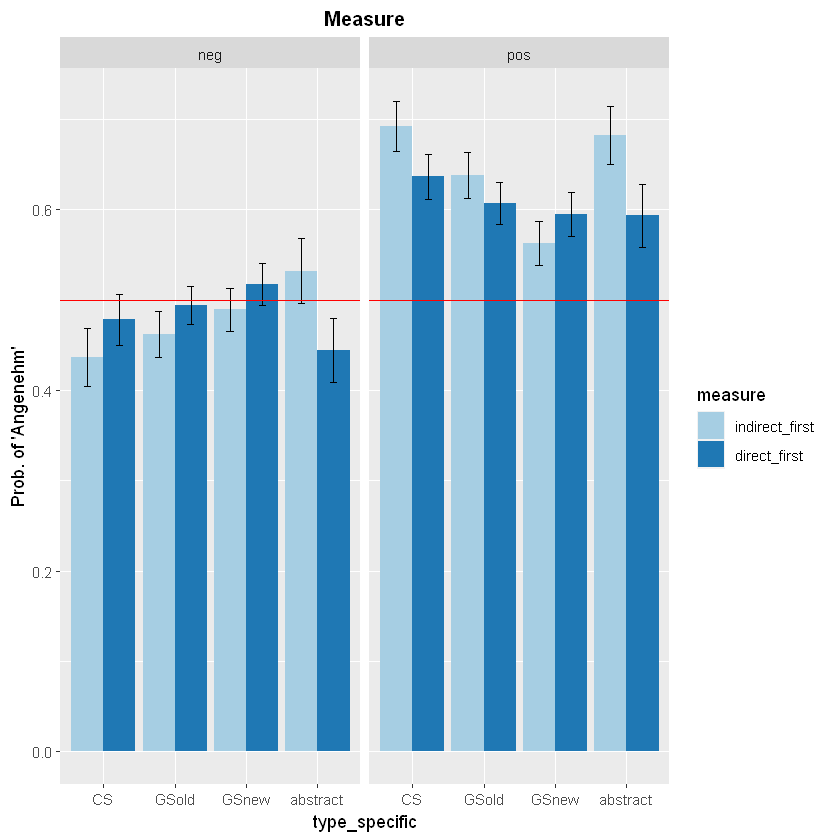

In [75]:
barplotDiffMeasure <- aggregate(prob ~ val + type_specific + measure, dataIndirect, mean)
barplotDiffMeasure$se <- aggregate(prob ~ val + type_specific + measure, dataIndirect, se)[[4]]

indirect.Measure <- ggplot(barplotDiffMeasure, aes (x = type_specific, y = prob, fill = measure)) +
  facet_grid(. ~ val) +
  geom_bar(stat = 'identity', position = position_dodge(), show.legend = TRUE) +
  geom_errorbar(aes(ymin= prob - se, ymax= prob + se), width=.2,
                position=position_dodge(.9)) +
  ggtitle("Measure") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Paired")  + 
  scale_y_continuous(name = "Prob. of 'Angenehm'")+
    geom_hline(yintercept = 0.5, color = "red")
indirect.Measure

#### Scatterplot: Location in Presentation Order (on probabilities)

In [76]:
presOrder <- aggregate(response ~ nr_pres + val , indirect, sum)
presOrder$nr_val <- aggregate(response ~ nr_pres + val, indirect, length) [[3]]
presOrder$se <- aggregate(response ~ nr_pres + val, indirect, se) [[3]]
presOrder$prob <- (presOrder$response/presOrder$nr_val)
#head(presOrder)

#aggregate(prob ~ val + type_specific, dataIndirect, mean)
plot.presOrder <- ggplot(presOrder, aes (x = nr_pres, y = prob, col = val)) +
  geom_point(show.legend = TRUE) +
  geom_hline(yintercept = 0.5, color = "red") +
  ggtitle("Positive and Negative Pairings") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_color_brewer(palette = "Set1") +
  scale_y_continuous(name = "Prob. of 'Angenehm'")
#plot.presOrder

#### Scatterplot: Location in Presentation Order (on reaction times)

In [2]:
presOrder <- aggregate(rt ~ condition + type_specific, indirect, mean)
presOrder$se <- aggregate(rt ~ condition + type_specific, indirect, se) [[2]]

#aggregate(prob ~ val + type_specific, dataIndirect, mean)
plot.presOrder <- ggplot(presOrder, aes (x = type_specific, y = rt, col = condition)) +
  geom_point(show.legend = TRUE) +
  ggtitle("Reaction Times") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_color_brewer(palette = "Set1") +
  scale_y_continuous(name = "Presentation Order")
plot.presOrder

ERROR: Error in eval(m$data, parent.frame()): Objekt 'indirect' nicht gefunden


#### Boxplot: categories (on probabilities)

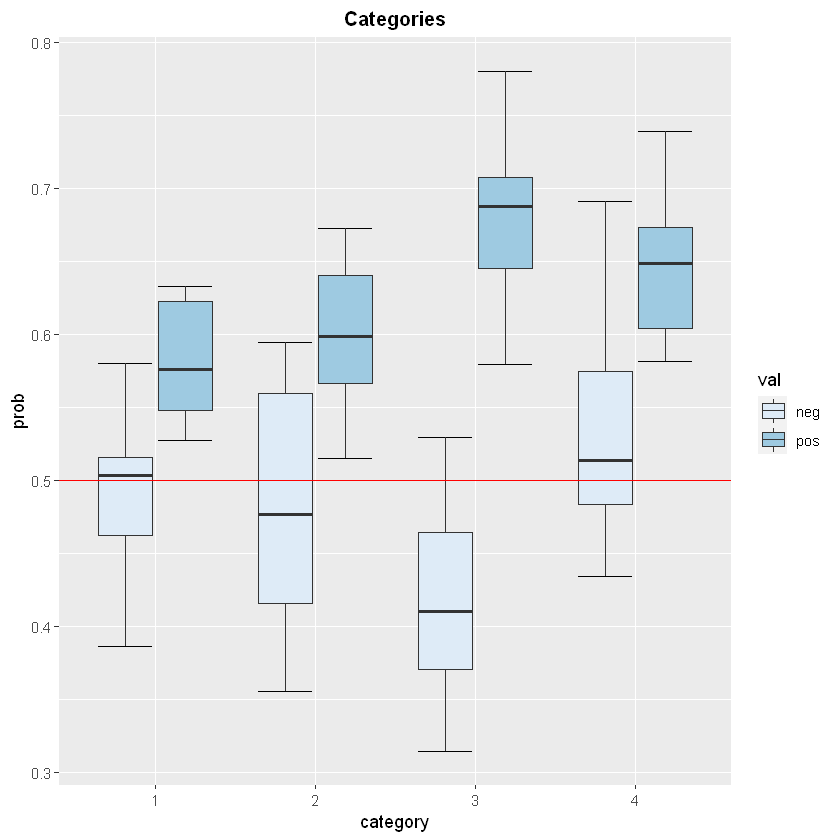

In [78]:
categoryIndirect <- aggregate(response ~  condition  + val +type_specific + category, indirect, sum )
categoryIndirect$nr_val <- aggregate(response ~ condition + val + type_specific + category, indirect, length)[[5]]
categoryIndirect$prob <- (categoryIndirect$response/categoryIndirect$nr_val)
#head(categoryIndirect)

plot.categories <- ggplot(categoryIndirect, aes (x = category, y = prob, fill = val)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot(show.legend = TRUE) +
  geom_hline(yintercept = 0.5, color = "red") +
  ggtitle("Categories") + 
  theme(plot.title = element_text (hjust = 0.5, face = "bold", size = 12)) +
  scale_fill_brewer(palette = "Blues") 
plot.categories

### Correlations between dependent measures

In [ ]:
temp <- direct[!direct$type_specific == "all",]
indirect$responseDirect <- temp$response
indirect$responseIndirect <- as.factor(indirect$response)

In [ ]:
#predict direct responses with answers from indirect responses: for positive pairings

#plot(responseDirect ~ responseIndirect, indirect[indirect$val == "pos",])
lm.pos <- lm(responseDirect ~ responseIndirect,indirect[indirect$val == "pos",])
#summary(lm.pos)

In [ ]:
#predict direct responses with answers from indirect responses: for positive pairings

#plot(responseDirect ~ responseIndirect, indirect[indirect$val == "neg",])
lm.neg <- lm(responseDirect ~ responseIndirect,indirect[indirect$val == "neg",])
#summary(lm.neg)

In [ ]:
#calculate correlations
cor(indirect$responseDirect[indirect$val == "pos"], indirect$response[indirect$val == "pos"])
cor(indirect$responseDirect[indirect$val == "neg"], indirect$response[indirect$val == "neg"])